In [ ]:
# 구글 드라이브 연결

from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/examples/3장/data'
os.makedirs(project_path, exist_ok=True)

# 현재 경로를 /content/drive로 설정
os.chdir(project_path)
print("현재 작업 디렉토리:", os.getcwd())
os.listdir(project_path)

Mounted at /content/drive
현재 작업 디렉토리: /content/drive/MyDrive/examples/3장/data


['normal.exe',
 'extract.py',
 'model.joblib',
 'rf_model.joblib',
 'malware.exe',
 'dog.png']

In [ ]:
!sudo apt-get update
!pip install numpy pefile

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,118 kB]
Get:14 http://ar

In [ ]:
import os
import pefile
import datetime

# PE 파일 로드
file_path = 'malware.exe'
pe = pefile.PE(file_path)

# 컴파일 시간 가져오기
timestamp = pe.FILE_HEADER.TimeDateStamp
compile_time = datetime.datetime.utcfromtimestamp(timestamp)

# 파일 생성 시간 가져오기 (윈도우 전용)
creation_time = datetime.datetime.fromtimestamp(os.path.getctime(file_path))

# 결과 출력: 학습에 사용하기 위해 추가 수치화 처리 필요
print("[ 적대적 공격에 취약한 특징 ]")
print("컴파일 시간:", compile_time)
print("생성 시간:", creation_time)

# 생성 시간에서 컴파일 시간을 뺀 값 계산: 학습에 사용하기 위해 추가 수치화 처리 필요
time_difference = creation_time - compile_time
print("\n[ 적대적 공격에 강한 특징 ]")
print("생성 시간에서 컴파일 시간을 뺀 값:", time_difference)

[ 적대적 공격에 취약한 특징 ]
컴파일 시간: 2009-12-05 22:52:01
생성 시간: 2024-08-06 07:13:03

[ 적대적 공격에 강한 특징 ]
생성 시간에서 컴파일 시간을 뺀 값: 5357 days, 8:21:02


In [ ]:
# 이미지 증강 기법

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

# 이미지 로드 및 변환
img = load_img('dog.png', target_size=(224, 224))  # 이미지 크기 조정
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # (1, height, width, channels)로 reshape

# 사용자 정의 노이즈 추가 함수
def add_noise(image):
    noise_factor = 0.1  # 노이즈 강도
    noise = np.random.normal(loc=0.0, scale=1.0, size=image.shape)
    noisy_image = image + noise_factor * noise
    noisy_image = np.clip(noisy_image, 0., 255.)
    return noisy_image

# 증강 기법 목록과 설정
augmentation_methods = {
    "Rotation": ImageDataGenerator(rotation_range=70),
    "Width Shift": ImageDataGenerator(width_shift_range=0.6),
    "Height Shift": ImageDataGenerator(height_shift_range=0.3),
    "Shear": ImageDataGenerator(shear_range=0.6),
    "Zoom": ImageDataGenerator(zoom_range=0.8),
    "Horizontal Flip": ImageDataGenerator(horizontal_flip=True),
    "Noise": ImageDataGenerator(preprocessing_function=lambda img: add_noise(img))
}

# 증강된 이미지 생성 및 시각화
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# 원본 이미지 시각화
axes[0].imshow(x[0].astype('uint8'))
axes[0].set_title('Original Image')
axes[0].axis('off')

# 각 증강 기법을 하나씩 적용하여 시각화
i = 1
for method_name, datagen in augmentation_methods.items():
    for batch in datagen.flow(x, batch_size=1):
        augmented_image = batch[0].astype('uint8')
        axes[i].imshow(augmented_image)
        axes[i].set_title(method_name)
        axes[i].axis('off')
        i += 1
        break  # 각 증강 기법별로 하나의 이미지만 생성
    if i >= 9:
        break

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 랜덤화 스무딩
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화

# 모델 정의
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Randomized Smoothing을 위한 예측 함수
def randomized_smoothing_predict(model, input_image, num_samples=100, noise_stddev=0.1):
    # 무작위 노이즈 추가 및 예측 수행
    predictions = []
    for _ in range(num_samples):
        noise = np.random.normal(loc=0.0, scale=noise_stddev, size=input_image.shape)
        noisy_image = input_image + noise
        prediction = model.predict(noisy_image[np.newaxis, ...])
        predictions.append(prediction)

    # 각 클래스별 평균 예측값 계산
    predictions = np.array(predictions)
    mean_predictions = np.mean(predictions, axis=0)
    return np.argmax(mean_predictions, axis=1)

# 무작위 노이즈를 사용하여 모델 예측 수행
sample_image = x_test[0]
true_label = y_test[0]
predicted_label = randomized_smoothing_predict(model, sample_image)

print(f'True label: {true_label}, Predicted label: {predicted_label}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8796 - loss: 0.4296 - val_accuracy: 0.9572 - val_loss: 0.1391
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9652 - loss: 0.1198 - val_accuracy: 0.9672 - val_loss: 0.1094
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9774 - loss: 0.0793 - val_accuracy: 0.9745 - val_loss: 0.0820
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9834 - loss: 0.0546 - val_accuracy: 0.9776 - val_loss: 0.0751
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9787 - val_loss: 0.0738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [ ]:
# 방어적 증류(Defensive Distillation)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.activations import softmax

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화

# 교사 모델 정의 및 훈련
teacher_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

teacher_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
teacher_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 교사 모델의 소프트 출력 생성
temperature = 10  # 온도 조정 파라미터
teacher_logits = teacher_model.predict(x_train)
teacher_soft_labels = softmax(teacher_logits / temperature, axis=1)

# 학생 모델 정의
student_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 학생 모델 컴파일 (KL Divergence 손실 사용)
student_model.compile(optimizer=Adam(), loss=KLDivergence(), metrics=['accuracy'])

# 학생 모델 훈련 (소프트 레이블 사용)
student_model.fit(x_train, teacher_soft_labels, epochs=5, validation_data=(x_test, y_test))

# 학생 모델 평가
student_model.evaluate(x_test, y_test)


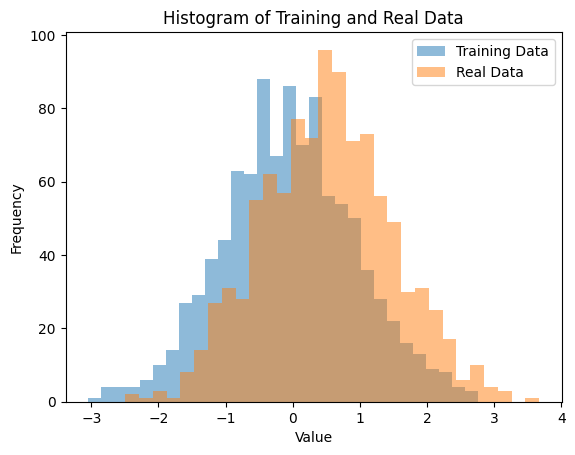

KL Divergence: inf
Covariate Shift 감지: 입력 데이터 분포가 변경되었습니다.


In [ ]:
# 데이터 드리프트 감지1: Covariate Shift 감지

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# 가상의 학습 데이터와 실제 데이터 생성
# 실제 상황에서 테스트 하려면 real_data 부분에 충분한 양의 신규 데이터를 대입해야 한다
np.random.seed(0)
train_data = np.random.normal(loc=0.0, scale=1.0, size=1000)  # 학습 데이터 분포
real_data = np.random.normal(loc=0.5, scale=1.0, size=1000)  # 실제 데이터 분포

# 히스토그램 비교
def plot_histogram(train_data, real_data):
    plt.hist(train_data, bins=30, alpha=0.5, label='Training Data')
    plt.hist(real_data, bins=30, alpha=0.5, label='Real Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Histogram of Training and Real Data')
    plt.show()

plot_histogram(train_data, real_data)

# KL Divergence 계산
def kl_divergence(p, q):
    """Compute KL divergence between two distributions."""
    p = np.array(p)
    q = np.array(q)
    return entropy(p, q)

# 두 데이터셋의 히스토그램 확률 분포
p_hist, _ = np.histogram(train_data, bins=30, density=True)
q_hist, _ = np.histogram(real_data, bins=30, density=True)

# KL divergence
kl_div = kl_divergence(p_hist, q_hist)
print(f'KL Divergence: {kl_div:.4f}')

# KL Divergence 값이 클 경우, Covariate Shift를 의심
if kl_div > 0.1:
    print("Covariate Shift 감지: 입력 데이터 분포가 변경되었습니다.")
else:
    print("Covariate Shift 없음: 입력 데이터 분포가 안정적입니다.")


In [ ]:
# 데이터 드리프트 감지2: Prior Probability Shift 감지

from collections import Counter

# 가상의 학습 레이블과 실제 레이블 생성
# 실제 상황에서 테스트 하려면 real_labels 부분에 충분한 양의 신규 데이터의 label 값을 대입해야 한다
np.random.seed(0)
train_labels = np.random.choice([0, 1], size=1000, p=[0.8, 0.2])  # 학습 데이터 레이블
real_labels = np.random.choice([0, 1], size=1000, p=[0.6, 0.4])  # 실제 데이터 레이블

# 클래스 비율 계산
def compute_class_distribution(labels):
    class_counts = Counter(labels)
    total_count = sum(class_counts.values())
    return {k: v / total_count for k, v in class_counts.items()}

train_dist = compute_class_distribution(train_labels)
real_dist = compute_class_distribution(real_labels)

print("Training Data Class Distribution:", train_dist)
print("Real Data Class Distribution:", real_dist)

# Prior Probability Shift 여부 판단
def check_prior_shift(train_dist, real_dist, threshold=0.1):
    shift_detected = False
    for cls in train_dist:
        if abs(train_dist[cls] - real_dist.get(cls, 0)) > threshold:
            shift_detected = True
            print(f"Prior Probability Shift 감지: 클래스 {cls}의 비율이 변경되었습니다.")
    if not shift_detected:
        print("Prior Probability Shift 없음: 클래스 비율이 안정적입니다.")

check_prior_shift(train_dist, real_dist)


Training Data Class Distribution: {0: 0.797, 1: 0.203}
Real Data Class Distribution: {0: 0.572, 1: 0.428}
Prior Probability Shift 감지: 클래스 0의 비율이 변경되었습니다.
Prior Probability Shift 감지: 클래스 1의 비율이 변경되었습니다.
